# Predict the Amount of Gold Recovered

### Table of Contents

* [Predict the Amount of Gold Recovered](#scrollTo=yWeNjdXc54LP)
    * [Integrated Project 2](#scrollTo=BELuEq6BnW9J)
    * [Initialization](#scrollTo=D3ltqRpjDqZc)
    * [Data Preparation](#scrollTo=YmNzfIkCDwtn)
        * [1.1. Learn Data](#scrollTo=fySzvJFFoLob)
            * [1.1.1. Load all Datasets and Print the Sample of Data](#scrollTo=3DjG_CRlCmW4)
            * [1.1.2. Show the Information of Datasets](#scrollTo=0uBEhRARCv3t)
            * [1.1.3. Checking Missing Values](#scrollTo=63pfX9niDVvo)
        * [1.2. Recovery Calculation](#scrollTo=UX_xRylIcVgC)
        * [1.3. Analyze the Feature not Available in the Test Set](#scrollTo=pn464iFQfmQu)
        * [1.4. Perform Data Preprocessing](#scrollTo=dqn1d_eUoWkT)
            * [1.4.1. Fill Missing Values](#scrollTo=dEdwAmRBYLfg)
            * [1.4.2. Fix date Column](#scrollTo=lcfQlN6iYSH6)
    * [Data Analytics and Data Visualization](#scrollTo=-HRrO7Vy_bvJ)
        * [2.1. The Changes in Metal Concentration](#scrollTo=HLG-KuAWwiW4)
            * [2.1.1. Gold (Au)](#scrollTo=xehYDp9-q_OP)
            * [2.1.2. Silver (Ag)](#scrollTo=SVW2F-iHrbX1)
            * [2.1.3. Lead/Timbal (Pb)](#scrollTo=65p-PZHluBYB)
        * [2.2. Compare the Feed Particle Size](#scrollTo=HG_GWjz_RxRj)
        * [2.3. Distribution the total Concentrations](#scrollTo=8CFzzvPGbLCq)
            * [2.3.1. Raw Feed](#scrollTo=M_2uXVnh0wOL)
            * [2.3.2. Rougher Output Concentrate](#scrollTo=GB_yeYwF00GM)
            * [2.3.3. Final Output Concentrate](#scrollTo=eorjDT1c2Gh5)
            * [2.3.4. Remove Anomali Values](#scrollTo=IE0CxlibJe78)
    * [Build the Model](#scrollTo=jbI6c1zNPBYk)
        * [3.1. Calculate the Final sMAPE](#scrollTo=vZ13a12cPF5b)
        * [3.2. Train the Models](#scrollTo=j2hLmfwkqr0e)
            * [3.2.1. Split the Data into Features and Target](#scrollTo=gO47_auCqvyo)
            * [3.2.2. Define Function to Return Model Score](#scrollTo=XpCcR_aT8NA0)
            * [3.2.3. Linear Regression](#scrollTo=XCJmZeta8Q5c)
            * [3.2.4. Decision Tree Model](#scrollTo=ten3H6Qk5CWn)
            * [3.2.5. Random Forest Model](#scrollTo=wuCKBC5ixPGZ)
            * [3.2.6. Lasso Regressor](#scrollTo=5OOPZb8h64Cz)
            * [3.2.7. Ridge Regressor](#scrollTo=MrB-a-kJKVWC)
            * [3.2.8. Neural Network](#scrollTo=iedwMYnKMxIr)
        * [3.3. Perform Best Model using Test Set](#scrollTo=Y3maZKFXPJP-)
* [Conclusions](#scrollTo=upaWagdBPaIX)



## Integrated Project 2 

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters. You need to:
- Prepare the data;
- Perform data analysis;
- Develop and train a model.

To complete the project, you may want to use documentation from pandas, matplotlib, and sklearn.

## Initialization

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import sidetable as stb

# model libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.datasets import make_classification
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, make_scorer
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## 1. Data Preparation

### 1.1. Learn Data

#### 1.1.1. Load all Datasets and Print the Sample of Data

In [ ]:
# load datasets
try:
    df_full = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full_new.csv')
    df_train = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')
    df_test = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')
    
except:
    try:
        df_full = pd.read_csv('gold_recovery_full_new.csv')
        df_train = pd.read_csv('gold_recovery_train.csv')
        df_test = pd.read_csv('gold_recovery_test.csv')

    except:
        df_full = pd.read_csv('/content/gold_recovery_full_new.csv')
        df_train = pd.read_csv('/content/gold_recovery_train.csv')
        df_test = pd.read_csv('/content/gold_recovery_test.csv')

In [ ]:
# all data
datasets = [df_full, df_train, df_test]

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

**Data Description**

**Technological process**
- `Rougher feed` — raw material
- `Rougher additions` (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
    - `Xanthate` — promoter or flotation activator;
    - `Sulphate` — sodium sulphide for this particular process;
    - `Depressant` — sodium silicate.
- `Rougher process` — flotation
- `Rougher tails` — product residues
- `Float banks` — flotation unit
- `Cleaner process` — purification
- `Rougher Au` — rougher gold concentrate
- `Final Au` — final gold concentrate

<p align="center">
    <img src="https://pictures.s3.yandex.net/resources/ore_1591699963.jpg" alt="drawing" width="600" height="390">
  </a>
</p>

**Parameters of stages**
- `air amount` — volume of air
- `fluid levels`
- `feed size` — feed particle size
- `feed rate`






In [ ]:
# print the sample of df_full
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
# print the sample of df_train
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
# print the sample of df_test
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

#### 1.1.2. Show the Information of Datasets

In [ ]:
# show the information of df_full
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [ ]:
# print the infortmation of df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [ ]:
# print the information of df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [ ]:
# show the descriptive statistic of datasets
for i in datasets:
    display(i.describe()), print()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

In [ ]:
# len the shape of datasets
for i in datasets:
    print(i.shape), print()

(19439, 87)

(16860, 87)

(5856, 53)



**Findings:**
- We have **3** datasets where there is a difference between the number of columns in the `train set` of **87** and the `test set` of **53** columns.


#### 1.1.3. Checking Missing Values

In [ ]:
# checking sd_full missing values
df_full.stb.missing()

,missing,total,percent
secondary_cleaner.output.tail_sol,1748,19439,8.992232
rougher.input.floatbank11_xanthate,453,19439,2.330367
rougher.state.floatbank10_e_air,436,19439,2.242914
primary_cleaner.output.concentrate_sol,370,19439,1.903390
secondary_cleaner.state.floatbank2_a_air,220,19439,1.131745
final.output.concentrate_sol,211,19439,1.085447
rougher.input.feed_size,145,19439,0.745923
primary_cleaner.output.concentrate_pb,116,19439,0.596739
primary_cleaner.input.xanthate,104,19439,0.535007
final.output.tail_pb,101,19439,0.519574


In [ ]:
# checkking df_train missing values
df_train.stb.missing()

,missing,total,percent
rougher.output.recovery,2573,16860,15.260973
rougher.output.tail_ag,2250,16860,13.345196
rougher.output.tail_sol,2249,16860,13.339265
rougher.output.tail_au,2249,16860,13.339265
secondary_cleaner.output.tail_sol,1986,16860,11.779359
rougher.input.floatbank11_xanthate,1904,16860,11.293001
final.output.recovery,1521,16860,9.021352
primary_cleaner.input.sulfate,1307,16860,7.752076
primary_cleaner.input.depressant,1262,16860,7.485172
rougher.calculation.au_pb_ratio,1242,16860,7.366548


In [ ]:
# checking df_test missing values
df_test.stb.missing()

,missing,total,percent
rougher.input.floatbank11_xanthate,353,5856,6.028005
primary_cleaner.input.sulfate,302,5856,5.157104
primary_cleaner.input.depressant,284,5856,4.849727
rougher.input.floatbank10_sulfate,257,5856,4.388661
primary_cleaner.input.xanthate,166,5856,2.834699
rougher.input.floatbank10_xanthate,123,5856,2.100410
rougher.input.feed_sol,67,5856,1.144126
rougher.input.floatbank11_sulfate,55,5856,0.939208
rougher.input.feed_rate,40,5856,0.683060
secondary_cleaner.state.floatbank3_a_air,34,5856,0.580601


In [ ]:
df_train.shape[0] * df_train.shape[1]

1466820

**Findings:**
- The most missing values are in the `df_train` datasets in the `rougher.output.recovery` column as much as **13%** of the data.

### 1.2. Recovery Calculation

We need to simulate the process of recovering gold from gold ore.

Using the following formula to simulate the recovery process:

<p align="center">
    <img src="https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg" alt="drawing" width="400" height="70">
  </a>
</p>

where:
- **C** — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
- **F** — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
- **T** — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [ ]:
# calculate the recovery
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

# formula
recovery = (C * (F - T)) / (F * (C - T)) * 100

rougher_output_recovery = df_train['rougher.output.recovery'].dropna()
recovery = recovery.iloc[rougher_output_recovery.index]

print('MAE:', mean_absolute_error(rougher_output_recovery, recovery))

MAE: 9.303415616264301e-15


### 1.3. Analyze the Feature not Available in the Test Set

In [ ]:
# find which columns are not in df_test
cols_not_in = df_train.columns.difference(df_test.columns)
list(cols_not_in)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [ ]:
# count the  columns not shown in the test_set
print(len(cols_not_in)), print()
print(len(cols_not_in) / len(df_train.columns) * 100, '%')

34

39.08045977011494 %


### 1.4. Perform Data Preprocessing

#### 1.4.1. Fill Missing Values

**Check the Missing Value in DataFrame**

In [ ]:
# data full isna
df_full[df_full.isna().any(axis=1)].head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,126.397495,12.709727,7.25,1.229626,8.092185,9.719728,19.077471,38.624404,15.911266,3.269298,7.095597,3.513846,1601.301169,-498.725777,1605.370031,-500.644437,1598.360694,-500.461991,1604.014273,-501.824136,35990.036451,3220.710538,3206.895723,3.168669,7.934791,1.763437,229.379445,40.601032,NaN,5.587750,10.865871,5.648950,10.786929,5.638302,0.000000,0.000000,0.000000,0.000000,0.000000,4.990718,0.901107,19.096033,2.126460,1003.354806,-501.078303,1603.648910,-498.000810,1603.488420,-495.577057,1402.004381,-497.117094,1203.394353,-494.391170,1202.592202,-500.167701,13.648648,5.146849,9.601115,3.108674,26.069763,-502.180953,24.044256,-502.252420,25.024571,-499.417407,23.983086,-499.931140,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,69.411904,7.443190,7.25,0.926251,7.680496,9.038210,18.68635

As mentioned in the data description

    Data is indexed with the date and time of acquisition (date feature). 
    Parameters that are next to each other in terms of time are often similar.

We will fill in the missing values with the `KNN Imputer` method.

In [ ]:
# create function to fill missing value
def fill_missing (dataset):
    df_date = pd.DataFrame(dataset.copy().loc[:, 'date']) # save the date field, because it is still needed
    drop_date = dataset.copy().drop(['date'], axis=1)

    knn_imputer = KNNImputer(n_neighbors=3) # model to fill missing values
    knn_imputer.fit(drop_date)
    data_trans = knn_imputer.transform(drop_date)

    data_new = pd.DataFrame(data_trans, columns=dataset.columns.drop(['date'])) # replace columns name
    data_new.insert(0, 'date', df_date.loc[:,'date']) # add the 'date' column

    return data_new

In [ ]:
# perform the function and create new data_full
data_full = fill_missing(df_full)
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
# # perform the function and create new data_train
data_train = fill_missing(df_train)
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
# # perform the function and create new data_test
data_test = fill_missing(df_test)
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [ ]:
# checking missing values
datasets = [data_full, data_train, data_test]

for i in datasets:
    print(i.isna().sum().sum()), print()

0

0

0



In [ ]:
# len the shape of datassets
for i in datasets:
    print(i.shape), print()

(19439, 87)

(16860, 87)

(5856, 53)



Jumlah datasets sebelum dan setelah *missing value* diatasi tetap sama, artinya tidak ada kesalahan saat proses pengisian nilai yang hilang.

#### 1.4.2. Fix `date` Column

In [ ]:
# change date column format
for df in datasets:
    df['date'] = pd.to_datetime(df.loc[:, 'date'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
for df in datasets:
    print(df.loc[:, 'date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


We have already fixed the column format.

## 2. Data Analytics and Data Visualization

### 2.1. The Changes in Metal Concentration

We will look at the process once again:

<p align="center">
    <img src="https://pictures.s3.yandex.net/resources/ore_1591699963.jpg" alt="drawing" width="500" height="340">
  </a>
</p>

We will only select columns containing metals concentrate as in processes **1**, **3**, **5**, and **8** above.

#### 2.1.1. Gold (Au)

In [ ]:
# we just select columns that contains roger.input.feed, and concetrate_au
data_au = data_full.loc[:, data_full.columns.str.contains('rougher.input.feed_au|concentrate_au')]
display(data_au.head(2)), print
print('Data Au Shape', data_au.shape), print()
list(data_au.columns)

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.input.feed_au,rougher.output.concentrate_au
0,42.192020,34.174427,6.486150,19.793808
1,42.701629,34.118526,6.478583,20.050975


Data Au Shape (19439, 4)



['final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au']

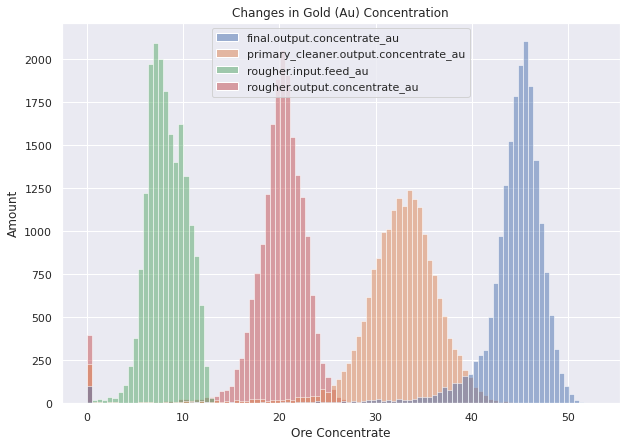

In [ ]:
# create data_au plot
sns.set()

plt.figure(figsize=(10, 7))
sns.histplot(data_au, bins=100)
plt.xlabel('Ore Concentrate')
plt.ylabel('Amount')
plt.title('Changes in Gold (Au) Concentration')
plt.show()

**Findings**
- In the gold extraction process from the initial stage to the final stage, it is clear that the gold concentration increases significantly in each extraction process.
- In each extraction process, it is also clear that there is almost no data in each process that overlaps, so we can distinguish the characteristics of the amount of concentration in each process.

#### 2.1.2. Silver (Ag)

In [ ]:
# we just select columns that contains roger.input.feed, and concetrate_ag
data_ag = data_full.loc[:, data_full.columns.str.contains('rougher.input.feed_ag|concentrate_ag')]
display(data_ag.head(2)), print
print('Data Ag Shape', data_ag.shape), print()
list(data_ag.columns)

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.input.feed_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,6.100378,11.500771
1,6.029369,8.558743,6.161113,11.615865


Data Ag Shape (19439, 4)



['final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'rougher.input.feed_ag',
 'rougher.output.concentrate_ag']

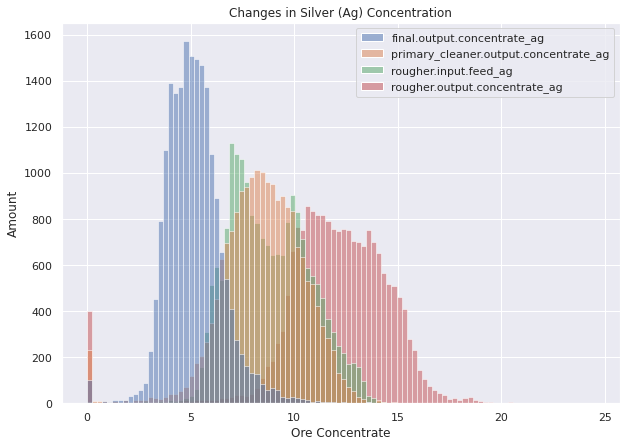

In [ ]:
# create data_ag plot
plt.figure(figsize=(10, 7))
sns.histplot(data_ag, bins=100)
plt.xlabel('Ore Concentrate')
plt.ylabel('Amount')
plt.title('Changes in Silver (Ag) Concentration')
plt.show()

**Findings**
- In the silver extraction stage, we can see that the concentration of silver ore increases from the raw material in the initial process, then decreases in the subsequent processes to the final concentrate.
- We also see that the distribution on silver concentration starting from the raw material is exactly the same as the primary cleaner distribution, and we can also see that almost half of the distributions overlap.

#### 2.1.3. Lead/Timbal (Pb)

In [ ]:
# we just select columns that contains roger.input.feed, and concetrate_pb
data_pb = data_full.loc[:, data_full.columns.str.contains('rougher.input.feed_pb|concentrate_pb')]
display(data_pb.head(2)), print
print('Data Pb Shape', data_pb.shape), print()
list(data_pb.columns)

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,2.284912,7.101074
1,9.968944,10.497069,2.266033,7.278807


Data Pb Shape (19439, 4)



['final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.input.feed_pb',
 'rougher.output.concentrate_pb']

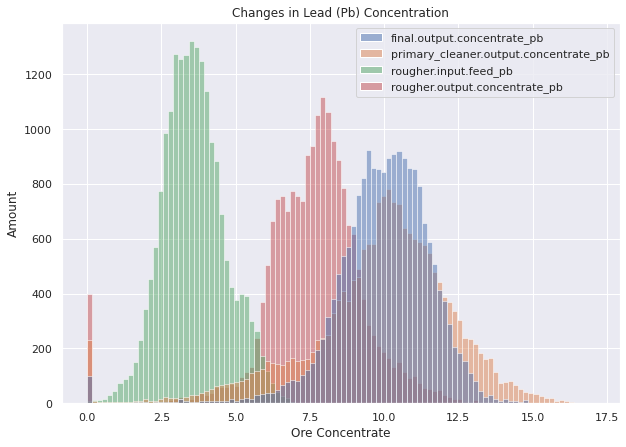

In [ ]:
# create data_pb plot
plt.figure(figsize=(10, 7))
sns.histplot(data_pb, bins=100)
plt.xlabel('Ore Concentrate')
plt.ylabel('Amount')
plt.title('Changes in Lead (Pb) Concentration')
plt.show()

**Finding**
- In the lead extraction process, we see an increase in data distribution in each process but the same distribution entering the primary cleaner and final concentrate stages.


**General Conclusions on Changes in Metal Concentration**
- There are differences in concentration distribution in each extraction process of the three metals:
    - In gold, the concentration increased significantly with each extraction process.
    - In silver, the increase occurs in the early stages but decreases in the subsequent process until the final output.
    - In lead, there is no decrease in concentration, it is just that at the end of the distribution process, the concentration is the same as the final output.

### 2.2. Compare the Feed Particle Size

In [ ]:
# filter the data
train_feed = data_train.loc[:, 'rougher.input.feed_size']
test_feed = data_test.loc[:, 'rougher.input.feed_size']

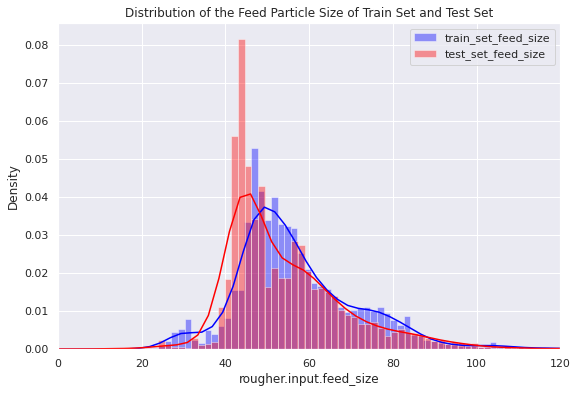

In [ ]:
# create the chart of feed size
plt.figure(figsize=(9, 6))
plt.xlim(0, 120)
plt.title('Distribution of the Feed Particle Size of Train Set and Test Set')
sns.distplot(train_feed, bins=300, color='blue', label='train_set_feed_size')
sns.distplot(test_feed, bins=300, color='red', label='test_set_feed_size')
plt.legend()
plt.show()

In general, the distributions of `rougher.input` on `train_set` and `test_set` are similar. We can use the model on both datasets.

### 2.3. Distribution the total Concentrations 

Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.

#### 2.3.1. Raw Feed

In [ ]:
# distribution total rougher.input.concentrate
rougher_input = data_full.loc[:, ((~data_full.columns.str.contains('_size|_rate')) & (data_full.columns.str.contains('rougher.input.feed_')))]
rougher_input['total'] = rougher_input.copy().sum(axis=1)
display(rougher_input.head(2)), print

print(rougher_input.shape), print()
list(rougher_input.columns)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,total
0,6.100378,2.284912,36.808594,6.486150,51.680034
1,6.161113,2.266033,35.753385,6.478583,50.659114


(19439, 5)



['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'total']

- There are **4** columns that belong to raw materials distinguished by their substances `ag`, `au`, `pb`, and `sol`.
- We added a new column to get the total concentration of all the substances.

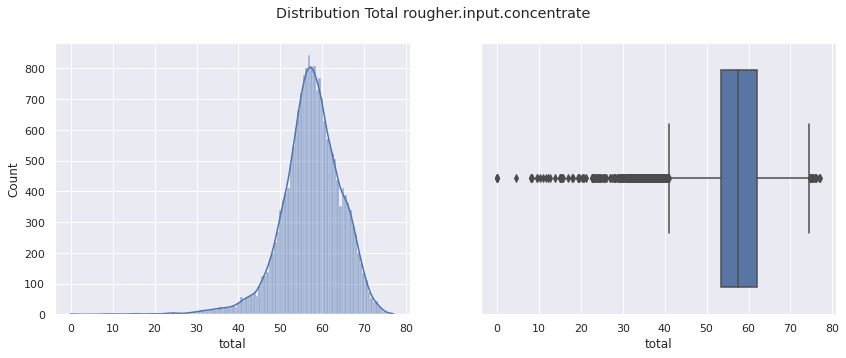

In [ ]:
# create chart of the distribution rougher.input.concentrate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=rougher_input, x=rougher_input['total'], kde=True, ax=axes[0])
sns.boxplot(data=rougher_input, x=rougher_input['total'], ax=axes[1])

fig.suptitle('Distribution Total rougher.input.concentrate')
plt.show()

#### 2.3.2. Rougher Output Concentrate

In [ ]:
# distribution total rougher.output.concentrate
rougher_output = data_full.loc[:, ((~data_full.columns.str.contains('_size|_rate')) & (data_full.columns.str.contains('rougher.output.concentrate_')))]
rougher_output['total'] = rougher_output.copy().sum(axis=1)
display(rougher_output.head(2)), print

print(rougher_output.shape), print()
list(rougher_output.columns)

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,total
0,11.500771,7.101074,28.029297,19.793808,66.42495
1,11.615865,7.278807,28.067063,20.050975,67.01271


(19439, 5)



['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'total']

- There are **4** columns that belong to the rougher. The output is distinguished by its substances `ag`, `au`, `pb`, and `sol`.
- We added a new column to get the total concentration of all the substances. 

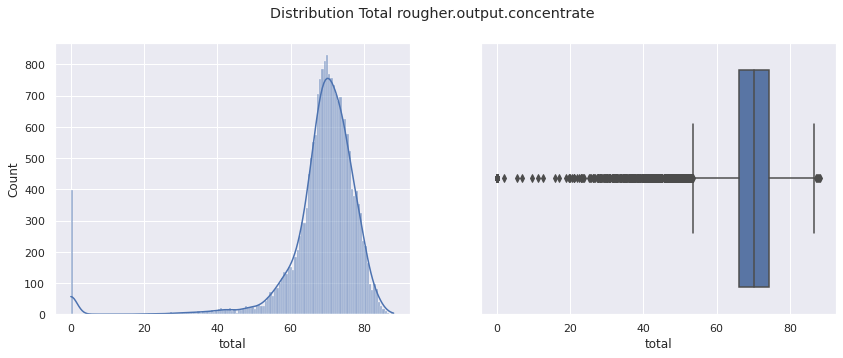

In [ ]:
# create chart of the distribution rougher.output.concentrate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=rougher_output, x=rougher_output['total'], kde=True, ax=axes[0])
sns.boxplot(data=rougher_output, x=rougher_output['total'], ax=axes[1])

fig.suptitle('Distribution Total rougher.output.concentrate')
plt.show()

#### 2.3.3. Final Output Concentrate

In [ ]:
# distribution total final.output.concentrate
final_output = data_full.loc[:, ((~data_full.columns.str.contains('_size|_rate')) & (data_full.columns.str.contains('final.output.concentrate_')))]
final_output['total'] = final_output.copy().sum(axis=1)
display(final_output.head(2)), print

print(final_output.shape), print()
list(final_output.columns)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,total
0,6.055403,9.889648,5.507324,42.192020,63.644396
1,6.029369,9.968944,5.257781,42.701629,63.957723


(19439, 5)



['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'total']

- There are **4** columns included in the final output distinguished by their substances `ag`, `au`, `pb`, and `sol`.
- We added a new column to get the total concentration of all the substances.

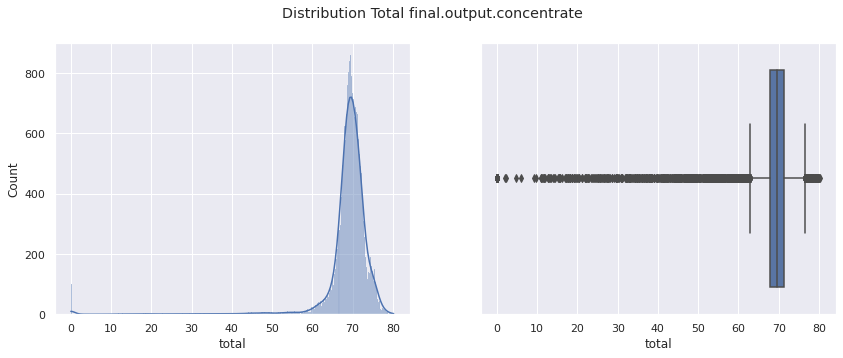

In [ ]:
# create chart of the distribution final.output.concentrate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=final_output, x=final_output['total'], kde=True, ax=axes[0])
sns.boxplot(data=final_output, x=final_output['total'], ax=axes[1])

fig.suptitle('Distribution Total final.output.concentrate')
plt.show()

**Consclusion**
- There are quite a lot of concentrates that have a value of **0**, this is probably because the error that occurs when the raw material is put into the extraction process for the first time is equal to **0**, if the raw material put into the first process is equal to **0** then the next process will also have no output value because it is the same as there is no raw material or concentrate to produce.
- We will remove the values of those columns from `train_set` and `test_set`, the model will tend to neglect to learn features that have a value of **0**.

#### 2.3.4. Remove Anomali Values

In [ ]:
# len dataset
print(data_full.shape)
print(data_train.shape)
data_test.shape

(19439, 87)
(16860, 87)


(5856, 53)

In [ ]:
# filter columns for remove abnormal values
raw_feed = list(rougher_input.drop(['total'], axis=1))
output_concentrate = list(rougher_output.drop(['total'], axis=1))
final_concentrate = list(final_output.drop(['total'], axis=1))

all_concentrate = []

for out in [raw_feed, output_concentrate, final_concentrate]:
    all_concentrate.extend(out)

all_concentrate

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au']

In [ ]:
# remove abnormal value
data_train = data_train.loc[(data_train[all_concentrate] != 0).all(axis=1)].reset_index(drop=True)

data_full_test = data_full.loc[data_test.index]
data_test = data_test.loc[(data_full_test[all_concentrate] != 0).all(axis=1)].reset_index(drop=True)

data_full = data_full.loc[(data_full[all_concentrate] != 0).all(axis=1)].reset_index(drop=True)

In [ ]:
# len dataset
print(data_full.shape)
print(data_train.shape)
data_test.shape

(18949, 87)
(15174, 87)


(5739, 53)

## 3. Build the Model

### 3.1. Calculate the Final sMAPE

The sMAPE formula: 
<p align="center">
    <img src="https://pictures.s3.yandex.net/resources/smape_1576239058_1589899769.jpg" alt="drawing" width="500" height="70">
  </a>
</p>


Final sMAPE formula:
<p align="center">
    <img src="https://pictures.s3.yandex.net/resources/_smape_1_1589900649.jpg" alt="drawing" width="500" height="70">
  </a>
</p>


In [ ]:
# create smape function

def smape_final(actual, forecast):
    result = (np.mean(abs(actual - forecast) / ((abs(actual) + abs(forecast)) / 2))) * 100
    final_smape = 0.25 * result[0] + 0.75 * result[1]
    return final_smape

smape_score = make_scorer(smape_final, greater_is_better=False)

### 3.2. Train the Models

#### 3.2.1. Split the Data into Features and Target

In [ ]:
# split data to features and targets
X = list(data_test.columns.drop('date'))
y = ['rougher.output.recovery', 'final.output.recovery']

In [ ]:
# apply the filtered list to split data
X_train = data_train[X].reset_index(drop=True)
y_train = data_train[y].reset_index(drop=True)

y_train.columns = [0, 1]

In [ ]:
# print the y_train samples
y_train.head()

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [ ]:
# split data_test into features and target
target_extract = data_full[['date', 'rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)
data_test = data_test.merge(target_extract, on='date')

X_test = data_test[X].reset_index(drop=True)
y_test = data_test[y].reset_index(drop=True)

y_test.columns = [0, 1]

In [ ]:
# print the X_test samples
X_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986,24.893998,-499.382374,14.916674,-

In [ ]:
# check deta X_train, y_train, X_test, y_test shapes
for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(15174, 52)
(15174, 2)
(5048, 52)
(5048, 2)


#### 3.2.2. Define Function to Return Model Score

In [ ]:
# create kfold model
def kfold_model(model):
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=smape_score, cv=cv, n_jobs=-1)
    scores = np.abs(scores)
    return scores.mean()

#### 3.2.3. Linear Regression

In [ ]:
# perform linear regression
model = LinearRegression()
kfold_model(model)

8.386927653860857

#### 3.2.4. Decision Tree Model

In [ ]:
# search best params for decision tree model
dt_results = defaultdict(list)

for depth in [1, 2, 5, 8, 10, 15, 20, 50]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_results['max_depth'].append(depth)
    dt_results['mean_smape'].append(kfold_model(model))

display(pd.DataFrame(dt_results))

,max_depth,mean_smape
0,1,9.841176
1,2,8.979199
2,5,7.969257
3,8,7.415967
4,10,7.199891
5,15,7.147967
6,20,7.358005
7,50,7.614060


#### 3.2.5. Random Forest Model

In [ ]:
# search best params for random forest model
rf_results = defaultdict(list)

for depth in range(1, 10):
    model = RandomForestRegressor(n_estimators=10, max_depth=depth, random_state=42)
    rf_results['max_depth'].append(depth)
    rf_results['mean_smape'].append(kfold_model(model))

display(pd.DataFrame(rf_results))

,max_depth,mean_smape
0,1,9.840027
1,2,8.965932
2,3,8.482601
3,4,8.042887
4,5,7.728777
5,6,7.440909
6,7,7.186223
7,8,6.929828
8,9,6.714667


#### 3.2.6. Lasso Regressor

In [ ]:
# search best params for lasso regressor model
lasso_results = defaultdict(list)

for alpha in [0.00, 1.0, 0.01, 2, 3, 5, 10, 20, 50]:
    model = Lasso(alpha=alpha, random_state=42)
    lasso_results['alpha'].append(alpha)
    lasso_results['mean_smape'].append(kfold_model(model))

display(pd.DataFrame(lasso_results))

,alpha,mean_smape
0,0.00,8.386928
1,1.00,8.608763
2,0.01,8.384670
3,2.00,8.736282
4,3.00,8.812116
5,5.00,8.952923
6,10.00,9.052418
7,20.00,9.124660
8,50.00,9.333017


#### 3.2.7. Ridge Regressor

In [ ]:
# search best params for ridge regressor model
ridge_results = defaultdict(list)

for alpha in np.linspace(0, 0.2, 11):
    model = Ridge(alpha=alpha, random_state=42)
    ridge_results['alpha'].append(alpha)
    ridge_results['mean_smape'].append(kfold_model(model))

display(pd.DataFrame(ridge_results))

,alpha,mean_smape
0,0.00,8.386928
1,0.02,8.386927
2,0.04,8.386927
3,0.06,8.386927
4,0.08,8.386926
5,0.10,8.386926
6,0.12,8.386925
7,0.14,8.386925
8,0.16,8.386925
9,0.18,8.386924


#### 3.2.8. Neural Network

In [ ]:
# search best params for neural network regressor model
nn_results = defaultdict(list)

for activation in ['identity', 'logistic', 'tanh', 'relu']:
    model = MLPRegressor(activation=activation, random_state=42)
    nn_results['activation'].append(activation)
    nn_results['mean_smape'].append(kfold_model(model))

display(pd.DataFrame(nn_results))

,activation,mean_smape
0,identity,13.855959
1,logistic,10.121382
2,tanh,10.228633
3,relu,9.541747


**Consclusion**
- The best model with the lowest **sMAPE** value is `Random Forest` with `max_depth` equal to **9**.

### 3.3. Perform Best Model using Test Set

In [ ]:
# create best random forest model

rf_model = RandomForestRegressor(n_estimators=10, max_depth=9, random_state=42)
rf_model.fit(X_train, y_train)

y_train_rf_pred = rf_model.predict(X_train)
y_test_rf_pred = rf_model.predict(X_test)

print('Train:', smape_final(y_train, y_train_rf_pred))
print('Test:', smape_final(y_test, y_test_rf_pred))

Train: 6.173535844823125
Test: 7.517603458663826


# Conclusions

**1. Data Preparation**
- We start by loading 3 datasets with differences in the number of features and rows.
- Quite a few missing values were found in each dataset.
- We filled in the missing values using the `KNN Imputer` method as the data was similar based on proximity in time.

**2. EDA and Data Visualization**
- There is a difference in concentration distribution in each extraction process of the three metals:
    - In gold, the concentration increases significantly in each extraction process.
    - In silver, the increase occurs initially but decreases in the following process until the final output.
    - In lead, there is no decrease in concentration, but in the final process, the concentration distribution is the same as the final output.
- In general, the distribution of `rougher.input` in `train_set` and `test_set` is similar.
- There are quite a few concentrates that have a value of **0**, this may be because the *error* that occurs when the raw material is put into the extraction process for the first time is equal to **0**.

**3. Model**
- We used **6** models to get the lowest **sMAPE** value.
- The best model with the lowest **sMAPE** value is `Random Forest` with `max_depth` equal to **10**.

**Main Conclusion**
- We get the **sMAPE** result on the `test set` with the best model of **7.623%**, this result is certainly very good because it has an **error** value below 10%.